# Functions – Assignment 3


---



## Theory Questions:-

## 1. What is the difference between a function and a method in Python?


**Answer:**  
- A **function** is a block of reusable code defined with `def` (or `lambda`) that is **not** bound to any object.  
- A **method** is a function **bound to an object** (i.e., defined inside a class) and is called on instances or the class itself. Methods implicitly receive the instance (`self`) or class (`cls`) as the first parameter.

**Example:**
```python
def add(a, b):      # function
    return a + b

class MathBox:
    def __init__(self, n): self.n = n
    def double(self):      # method
        return 2 * self.n
```


In [ ]:

def add(a, b):      # function
    return a + b

class MathBox:
    def __init__(self, n): self.n = n
    def double(self):      # method
        return 2 * self.n

print("Function add(2, 3) ->", add(2, 3))
print("Method MathBox(5).double() ->", MathBox(5).double())


Function add(2, 3) -> 5
Method MathBox(5).double() -> 10


## 2. Explain the concept of function arguments and parameters in Python?


**Answer:**  
- **Parameters** are the names listed in the function definition.  
- **Arguments** are the actual values supplied when calling the function.  
Python supports positional, keyword, default, and variable-length (`*args`, `**kwargs`) arguments.

**Example:**

In [ ]:

def demo(a, b=10, *args, **kwargs):  # a,b are parameters; args/kwargs collect extra values
    return a, b, args, kwargs

print(demo(1))                           # positional with default b
print(demo(1, 2, 3, 4, x=5, y=6))        # positional + *args + **kwargs
print(demo(a=7, b=8))                    # keyword arguments


(1, 10, (), {})
(1, 2, (3, 4), {'x': 5, 'y': 6})
(7, 8, (), {})


## 3. What are the different ways to define and call a function in Python?


**Answer:**  
- `def` statement (named function)  
- `lambda` expression (anonymous function)  
- `functools.partial` to pre-fill arguments (creates a callable)  
- Methods inside classes (called on instances)  


In [ ]:

from functools import partial

def multiply(a, b): return a * b
times3 = partial(multiply, 3)    # callable with b to be provided
lam = lambda x: x + 1            # lambda

print("def:", multiply(2, 5))
print("lambda:", lam(9))
print("partial:", times3(7))      # uses a=3, b=7


def: 10
lambda: 10
partial: 21


## 4. What is the purpose of the `return` statement in a Python function?


**Answer:**  
`return` ends the function and sends a value back to the caller. Without `return`, the function returns `None`. It can also return multiple values as a tuple.


In [ ]:

def both(a, b):
    if b == 0:
        return None
    return a // b, a % b  # returns a tuple

print(both(10, 3))
print(both(5, 0))


(3, 1)
None


## 5. What are iterators in Python and how do they differ from iterables?


**Answer:**  
- An **iterable** is any object capable of returning its members one at a time (e.g., list, str). It implements `__iter__()` returning an **iterator**.  
- An **iterator** is the object that actually yields values one by one and implements `__iter__()` and `__next__()`.


In [ ]:

iterable = [1, 2, 3]
it = iter(iterable)   # get iterator
print(next(it), next(it), next(it))


1 2 3


## 6. Explain the concept of generators in Python and how they are defined?


**Answer:**  
A **generator** is a special iterator created by a function that uses `yield`, or by a generator expression. Generators produce values lazily, resuming state between yields.


In [ ]:

def countdown(n):
    while n > 0:
        yield n
        n -= 1

print(list(countdown(5)))


[5, 4, 3, 2, 1]


## 7. What are the advantages of using generators over regular functions?


**Answer:**  
- **Lazy evaluation**: compute items only when needed.  
- **Low memory**: don't store the whole sequence in memory.  
- **Composability**: easy to pipeline data processing.  
- **Stateful iteration** without classes.


## 8. What is a lambda function in Python and when is it typically used?


**Answer:**  
A **lambda** is a small anonymous function defined with `lambda params: expr`. Use it for short throwaway functions, especially as arguments to higher-order functions like `sorted`, `map`, or `filter`.


In [ ]:

pairs = [(2, 'b'), (1, 'a'), (3, 'c')]
print(sorted(pairs, key=lambda t: t[0]))


[(1, 'a'), (2, 'b'), (3, 'c')]


## 9. Explain the purpose and usage of the `map()` function in Python?


**Answer:**  
`map(func, iterable, ...)` applies `func` to each item (or items across multiple iterables) and returns a **lazy iterator**. Often wrapped in `list()` when all results are needed at once.


In [ ]:

def square(x): return x*x
print(list(map(square, [1,2,3,4])))


[1, 4, 9, 16]


## 10. What is the difference between `map()`, `reduce()`, and `filter()` functions in Python?


**Answer (concise):**  
- **map(f, xs)**: transforms each item -> same number of items.  
- **filter(pred, xs)**: keeps only items where `pred(item)` is True -> **subset** of items.  
- **reduce(f, xs)** (from `functools`): folds/aggregates the iterable down to **one value** by repeatedly combining items.

**Mini demo:**

In [ ]:

from functools import reduce

xs = [1,2,3,4,5]
print("map x*2:", list(map(lambda x: x*2, xs)))
print("filter even:", list(filter(lambda x: x%2==0, xs)))
print("reduce sum:", reduce(lambda a,b: a+b, xs))


map x*2: [2, 4, 6, 8, 10]
filter even: [2, 4]
reduce sum: 15


## 11. Using pen & paper write the internal mechanism for sum operation using `reduce` on [47, 11, 42, 13]?


**Answer (step-by-step breakdown):**  
Let `xs = [47, 11, 42, 13]` and `f(a,b) = a + b`. `reduce(f, xs)` proceeds as:
1. Start with the first two elements: `acc = f(47, 11) = 58`  
2. Combine with next: `acc = f(58, 42) = 100`  
3. Combine with next: `acc = f(100, 13) = 113`  
**Final result = 113.**


In [ ]:

from functools import reduce
xs = [47, 11, 42, 13]
total = reduce(lambda a,b: a+b, xs)
print("reduce sum on", xs, "->", total)


reduce sum on [47, 11, 42, 13] -> 113


## Practical Questions:-

## 1. Write a Python function that takes a list of numbers as input and returns the sum of all even numbers in the list?

**Answer:** Define a function and test it.

In [ ]:

def sum_of_evens(nums):
    return sum(x for x in nums if x % 2 == 0)

print(sum_of_evens([1,2,3,4,5,6,7,8]))  # expected 20


20


## 2.  Create a Python function that accepts a string and returns the reverse of that string?

**Answer:**

In [ ]:

def reverse_string(s):
    return s[::-1]

print(reverse_string("Functions are fun!"))


!nuf era snoitcnuF


## 3.  Implement a Python function that takes a list of integers and returns a new list containing the squares of each number?

**Answer:**

In [ ]:

def squares(nums):
    return [x*x for x in nums]

print(squares([1,2,3,4,5]))


[1, 4, 9, 16, 25]


## 4. Write a Python function that checks if a given number is prime or not from 1 to 200?

**Answer:**

In [ ]:

def is_prime(n):
    if n < 2:
        return False
    if n in (2,3):
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i+2) == 0:
            return False
        i += 6
    return True

primes_1_200 = [n for n in range(1,201) if is_prime(n)]
print(primes_1_200)


[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199]


## 5.  Create an iterator class in Python that generates the Fibonacci sequence up to a specified number of terms?

**Answer:**

In [ ]:

class Fibonacci:
    def __init__(self, terms):
        self.terms = terms
        self.count = 0
        self.a, self.b = 0, 1
    def __iter__(self):
        return self
    def __next__(self):
        if self.count >= self.terms:
            raise StopIteration
        if self.count == 0:
            self.count += 1
            return 0
        elif self.count == 1:
            self.count += 1
            return 1
        else:
            self.a, self.b = self.b, self.a + self.b
            self.count += 1
            return self.b

print(list(Fibonacci(10)))


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


## 6. Write a generator function in Python that yields the powers of 2 up to a given exponent?

**Answer:**

In [ ]:

def powers_of_two(max_exp):
    for e in range(max_exp + 1):
        yield 2 ** e

print(list(powers_of_two(10)))


[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


## 7.  Implement a generator function that reads a file line by line and yields each line as a string?

**Answer:**

In [ ]:

# create a demo file
demo_path = "/mnt/data/demo_lines.txt"
with open(demo_path, "w") as f:
    f.write("alpha\n")
    f.write("beta\n")
    f.write("gamma\n")

def read_lines(path):
    with open(path, "r") as f:
        for line in f:
            yield line.rstrip("\n")

print(list(read_lines(demo_path)))


['alpha', 'beta', 'gamma']


## 8.  Use a lambda function in Python to sort a list of tuples based on the second element of each tuple?

**Answer:**

In [ ]:

data = [("x", 5), ("a", 3), ("m", 9), ("b", 1)]
sorted_data = sorted(data, key=lambda t: t[1])
print(sorted_data)


[('b', 1), ('a', 3), ('x', 5), ('m', 9)]


## 9. Write a Python program that uses `map()` to convert a list of temperatures from Celsius to Fahrenheit?

**Answer:**  F = C * 9/5 + 32

In [ ]:

celsius = [-40, -10, 0, 25, 30, 100]
fahrenheit = list(map(lambda c: c * 9/5 + 32, celsius))
print("C:", celsius)
print("F:", fahrenheit)


C: [-40, -10, 0, 25, 30, 100]
F: [-40.0, 14.0, 32.0, 77.0, 86.0, 212.0]


## 10.  Create a Python program that uses `filter()` to remove all the vowels from a given string?

**Answer:**

In [ ]:

def remove_vowels(s):
    vowels = set("aeiouAEIOU")
    return "".join(filter(lambda ch: ch not in vowels, s))

print(remove_vowels("Generators and Iterators"))


Gnrtrs nd trtrs


## 11. ) Imagine an accounting routine used in a book shop. It works on a list with sublists, which look like this:
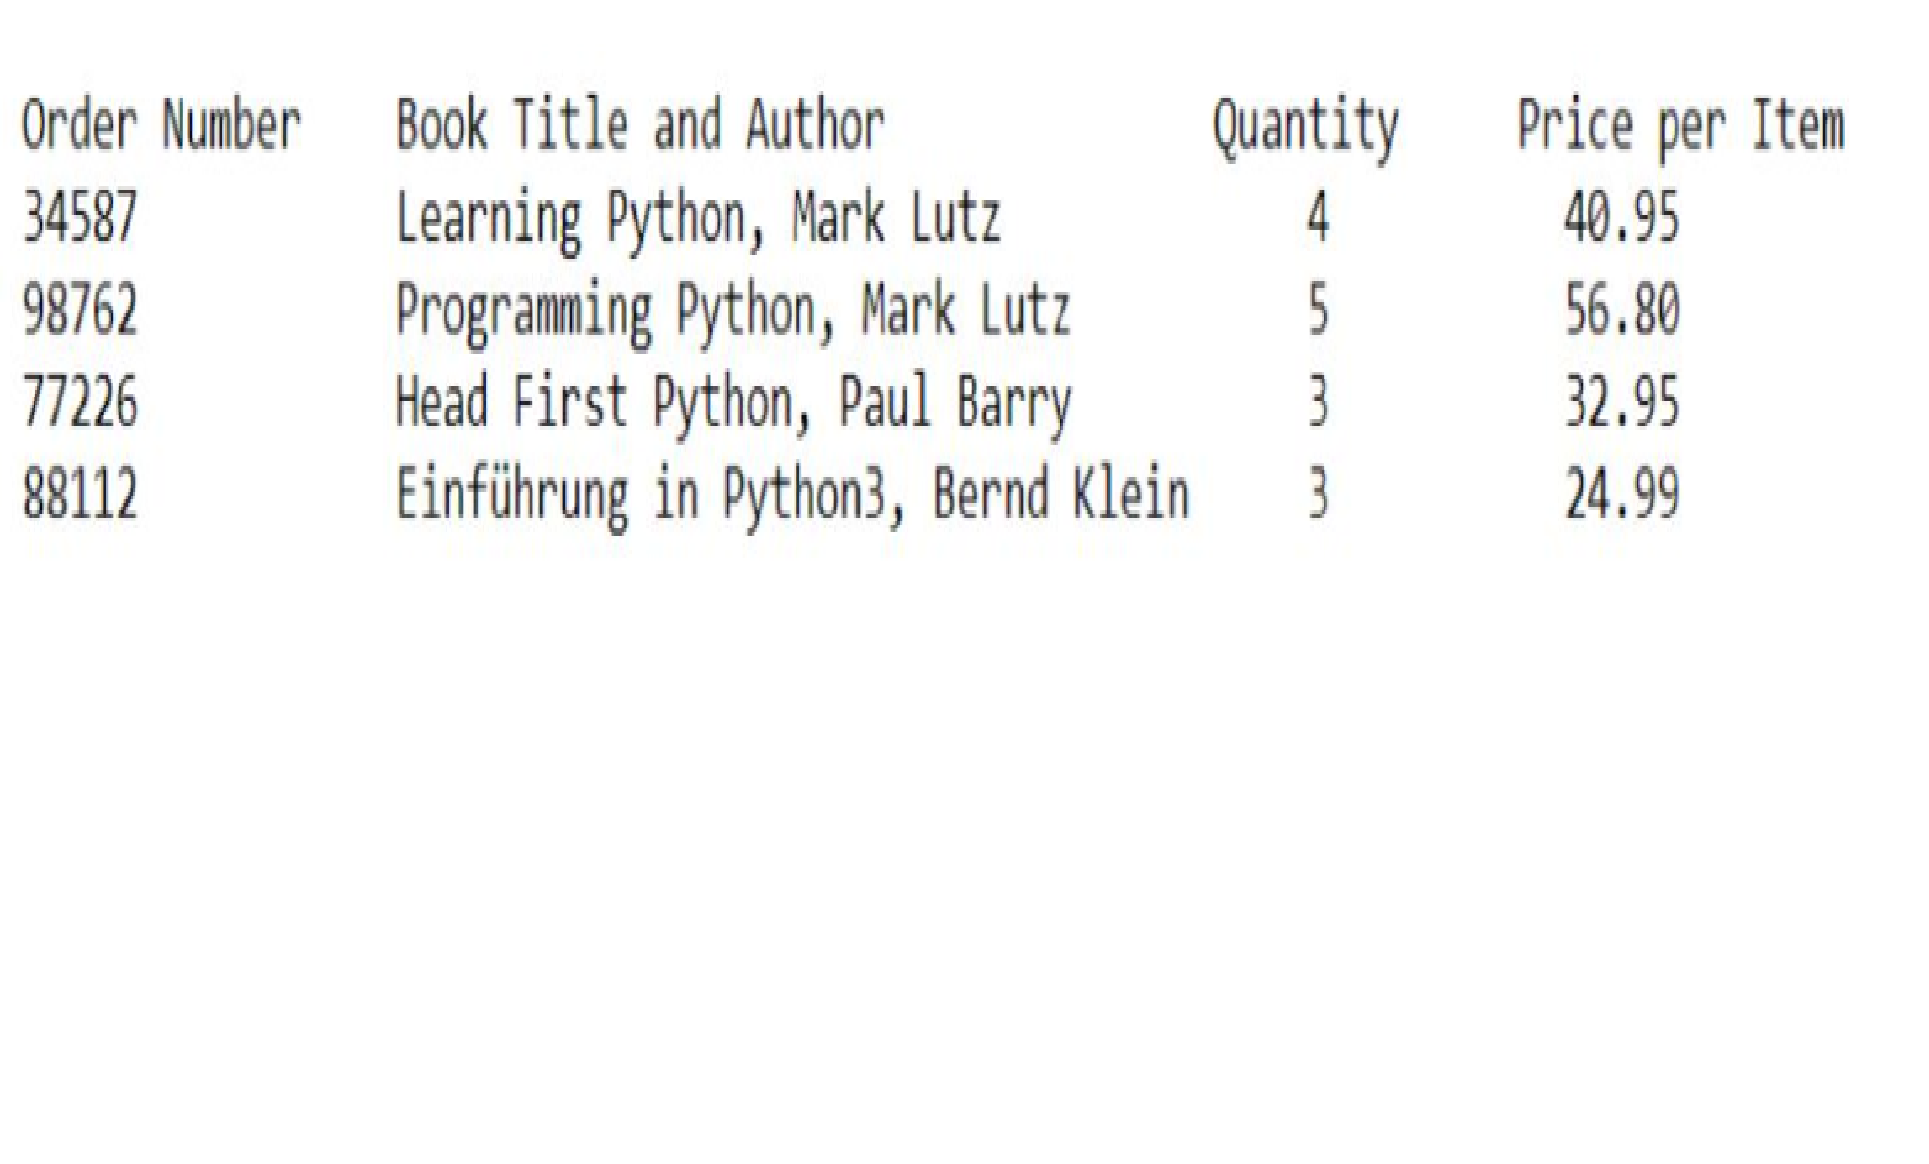

## Write a Python program, which returns a list with 2-tuples. Each tuple consists of the order number and the product of the price per item and the quantity. The product should be increased by 10,- € if the value of the order is smaller than 100,00 €. Write a Python program using lambda and map.


**Answer:**  
.


In [ ]:

orders = [
    [34587, "Learning Python, Mark Lutz", 4, 40.95],
    [98762, "Programming Python, Mark Lutz", 5, 56.80],
    [77226, "Head First Python, Paul Barry", 3, 32.95],
    [88112, "Einführung in Python3, Bernd Klein", 3, 24.99],
]

compute = lambda rec: (rec[0], (rec[2] * rec[3]) if (rec[2] * rec[3]) >= 100 else (rec[2] * rec[3]) + 10)
result = list(map(compute, orders))
print(result)


[(34587, 163.8), (98762, 284.0), (77226, 108.85000000000001), (88112, 84.97)]
